In [1]:
import pandas as pd
import numpy as np
import spacy
import networkx as nx

import matplotlib.pyplot as plt
import re
import community as community_louvian
from spacy import displacy
from statistics import mean

In [ ]:
!python3 -m spacy download en_core_web_sm
!pip install nltk
!pip install textblob
!python -m textblob.download_corpora

In [ ]:
!pip install networkx
!pip install pyvis
!pip install pyvis.network
!pip install python-louvain
!pip install louvain

In [3]:
nlp = spacy.load("en_core_web_sm")

In [4]:
data = 'https://raw.githubusercontent.com/TheAhmir/HubermanAnalysis/main/my_dataframes/cleaned_data.csv'
data_df = pd.read_csv(data)
data_df

,video_title,video_description,video_url,youtube_id,num_comments,noun_phrases,noun_phrases(desc),view_count
0,Journal Club with Dr. Peter Attia | Metformin ...,"In this journal club episode, my guest is Stan...",https://hubermanlab.com/journal-club-with-dr-p...,z8c6EyMNd0A,318,"['Journal Club', 'Longevity', 'The Power', 'Be...","['this journal club episode', 'my guest', 'Sta...",190593.0
1,GUEST SERIES | Dr. Paul Conti: How to Understa...,This is episode 1 of a 4-part special series o...,https://hubermanlab.com/guest-series-dr-paul-c...,tLRCS48Ens4,946,"['Understand', 'Assess', 'Your Mental Health']","['This', 'episode', 'a 4-part special series',...",1625327.0
2,"Marc Andreessen: How Risk Taking, Innovation &...","In this episode, my guest is Marc Andreessen, ...",https://hubermanlab.com/marc-andreessen-how-ri...,yixIc1Ai6jM,262,"['How Risk Taking', 'Innovation', 'Artificial ...","['this episode', 'my guest', 'the legendary so...",125246.0
3,Goals Toolkit: How to Set & Achieve Your Goals,"In this episode, I describe science-based prot...",https://hubermanlab.com/goal-toolkit-how-to-se...,CrtR12PBKb0,539,"['Goals Toolkit', 'Set', 'Your Goals', 'Goals ...","['this episode', 'I', 'science-based protocols...",464268.0
4,"Dr. David Linden: Life, Death & the Neuroscien...","In this episode, my guest is Dr. David Linden,...",https://hubermanlab.com/dr-david-linden-life-d...,29n0WG317tM,497,"['Life', 'Death', 'the Neuroscience', 'Your Un...","['this episode', 'my guest', 'Ph.D.', 'profess...",259610.0
...,...,...,...,...,...,...,...,...
143,Understanding and Using Dreams to Learn and to...,This episode is all about the two major kinds ...,https://hubermanlab.com/understanding-and-usin...,FFwA0QFmpQ4,1070,"['Dreams', 'Using Dreams']","['This episode', 'the two major kinds', 'dream...",786737.0
144,"How to Defeat Jetlag, Shift Work & Sleeplessness","In this episode, I discuss a simple and reliab...",https://hubermanlab.com/find-your-temperature-...,NAATB55oxeQ,990,"['How to Defeat', 'Jetlag', 'Shift Work', 'Sle...","['this episode', 'I', 'a simple and reliable m...",420769.0
145,"Using Science to Optimize Sleep, Learning & Me...","“Office Hours” — In this episode, Dr. Huberman...",https://hubermanlab.com/using-science-to-optim...,nwSkFq4tyC0,1085,"['Science', 'Optimize Sleep', 'Learning', 'Met...","['this episode', 'your most commonly asked que...",1203183.0
146,Master Your Sleep & Be More Alert When Awake,Today’s episode provides a host of information...,https://hubermanlab.com/master-your-sleep-and-...,nm1TxQj9IsQ,1196,"['Master Your Sleep', 'Master Your Sleep']","['Today’s episode', 'a host', 'information', '...",3023162.0


#Scatterplots

I created Scatterplots displaying the number of comments recieved for each video in chronilogical order as well as the number of views recieved for each video in chronilogical order. The size of each dot correlates to the number of characters used in the title of each video.

I found out that the way the data was extracted originally was essential in chronilogical order, so i wanted to use that to make a visualization.

This idea behind this was to determine overall success from the Huberman's first video to the most current video in my data. I chose to visualize this using a scatterplot because I felt that it might be too much data to visualize all of it in a legible way using a line plot.

In [ ]:
size = [(len(x.split())//2)**2 for x in data_df.loc[::-1,"video_title"]]
first = data_df.loc[0,"video_title"]
len(first.split())
size

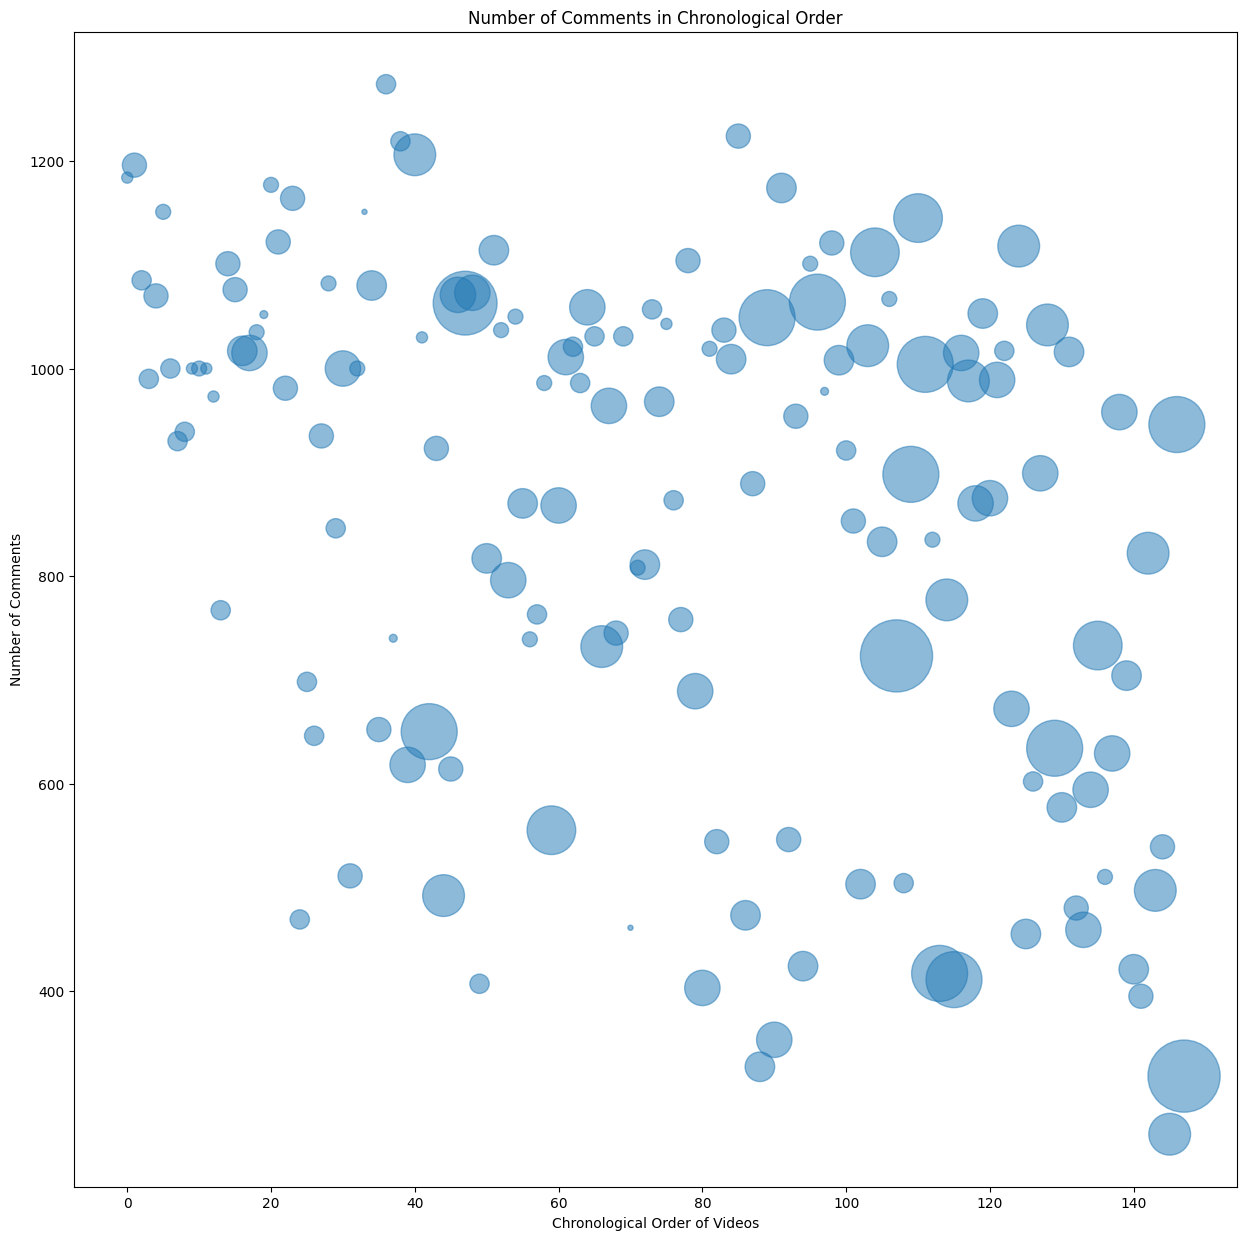

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

x = list(range(148))
y = list(data_df.loc[::-1,"num_comments"])
size = [(len(x.split())/2)**3.8 for x in data_df.loc[::-1,"video_title"]]

plt.title("Number of Comments in Chronological Order")
plt.xlabel("Chronological Order of Videos") #x label
plt.ylabel("Number of Comments") #y label

plt.scatter(x, y, s=size, alpha=0.5)
plt.gcf().set_size_inches((15, 15))
plt.savefig('Number of Comments in Chronological Order.pdf')
plt.show()

I wasn't able to come to many conclusions using this scatterplot. It seems that Huberman has recieved the same amount of interaction as far as comments go throughout his videos and the length of his titles doesn't seem to have an affect of the number of comments.

Next, I wanted to look at how views might of changed throughout his videos.

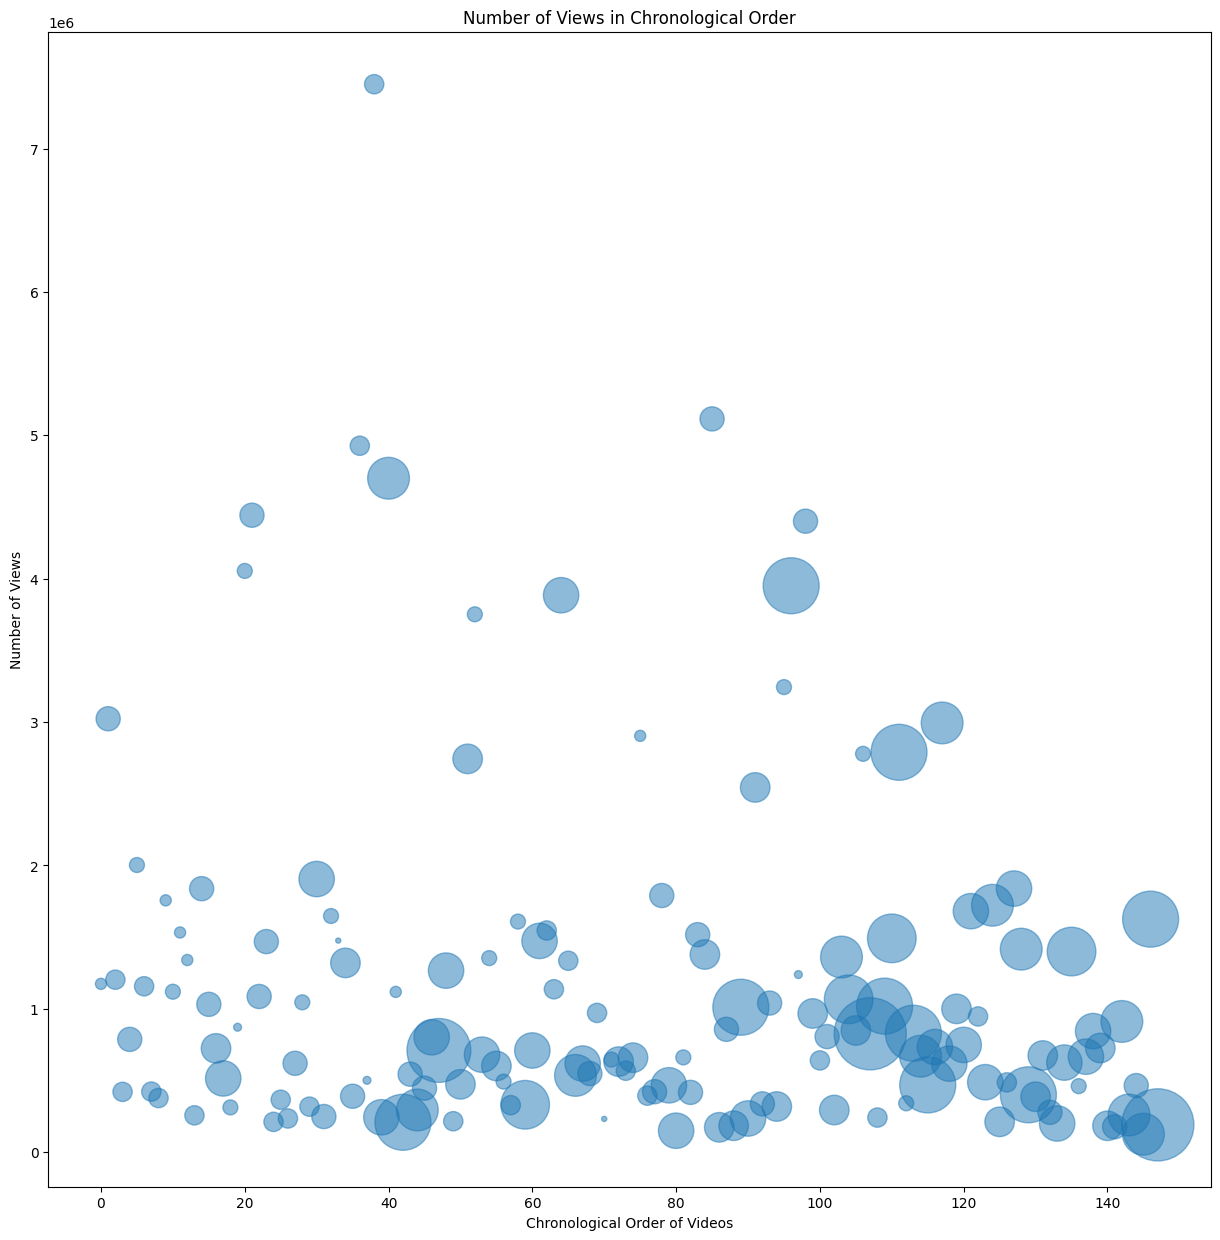

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

x = list(range(148))
y = list(data_df.loc[::-1,"view_count"])
size = [(len(x.split())/2)**3.8 for x in data_df.loc[::-1,"video_title"]]

plt.title("Number of Views in Chronological Order")
plt.xlabel("Chronological Order of Videos") #x label
plt.ylabel("Number of Views") #y label

plt.scatter(x, y, s=size, alpha=0.5)
plt.gcf().set_size_inches((15, 15))
plt.savefig('Number of Views in Chronological Order.pdf')
plt.show()

Again the number of views for each video seem to stay around the same throughout his videos. However, I found it interesting that his the length of his titles seem to have gotten larger as they get more current (this is indicated by the size of each point in the scatterplot).

One reason for this might be that he has had more videos with guest stars in more recent videos, whose name he nearly always puts in the video title.

This conclusion led me to my next visualization.

###Huberman's video performance when comparing videos with a guest star vs without one

To figure out if a video contained a guest star, I used Spacy's entity recognition. I looped through each title and assumed that if Spacy recognized a word as a "PERSON", it must be a guest star of his video.

Using this method, I created two lists: one of the number of comments in solo videos and one of guest star videos. Then I created bar plots of the mean of the lists.

In [86]:
colab = []
solo = []
for item in data_df.index:
  doc = nlp(data_df.loc[item,'video_title'])
  etypes = [tok.ent_type_ for tok in doc]
  if 'PERSON' in etypes:
      colab.append(data_df.loc[item,'num_comments'])
  else:
    solo.append(data_df.loc[item,'num_comments'])


In [87]:
print(len(solo))
print(len(colab))

79
69


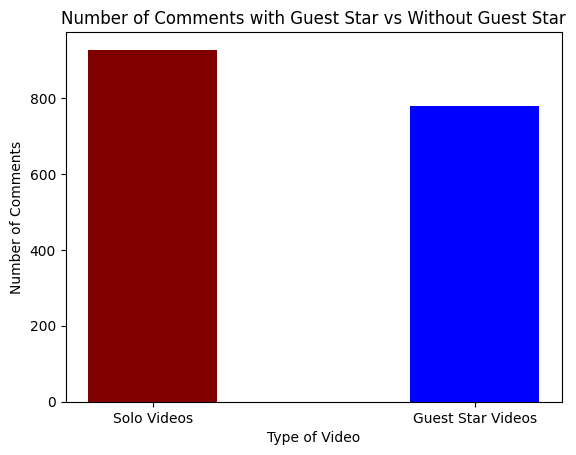

In [83]:
from statistics import mean

bar_x = ["Solo Videos", "Guest Star Videos"]
bar_y = []
bar_y.append(mean(solo))
bar_y.append(mean(colab))

plt.bar(bar_x, bar_y, color =['maroon', 'blue'],
        width = 0.4)

plt.xlabel("Type of Video")
plt.ylabel("Number of Comments")
plt.title("Number of Comments with Guest Star vs Without Guest Star")
plt.savefig('Number of Comments with Guest Star vs Without Guest Star.pdf')
plt.show()


This visualization was unexpected. My data shows that Huberman's solo videos get more comments than his videos with guest stars. I expected guest star videos to introduce a professionals perspective and cause more viewers to leave comments.

This could potentially be because he has more videos solo than with guess stars.

As with the scatterplot, I created the same visualization using the mean view count of each group to get a better picture of the data.

In [84]:
colab = []
solo = []
for item in data_df.index:
  doc = nlp(data_df.loc[item,'video_title'])
  etypes = [tok.ent_type_ for tok in doc]
  if 'PERSON' in etypes:
      colab.append(data_df.loc[item,'view_count'])
  else:
    solo.append(data_df.loc[item,'view_count'])

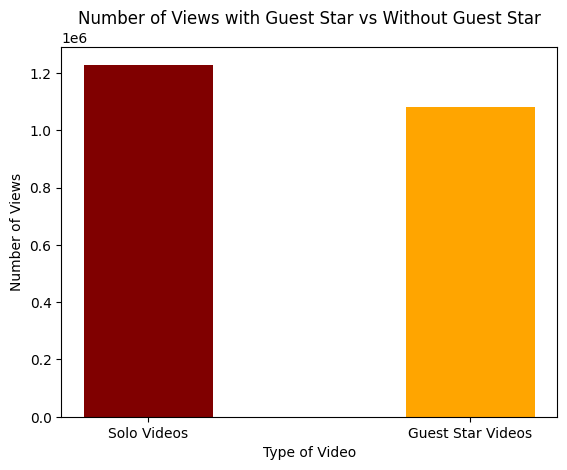

In [85]:
from statistics import mean

bar_x = ["Solo Videos", "Guest Star Videos"]
bar_y = []
bar_y.append(mean(solo))
bar_y.append(mean(colab))

plt.bar(bar_x, bar_y, color =['maroon', 'orange'],
        width = 0.4)

plt.xlabel("Type of Video")
plt.ylabel("Number of Views")
plt.title("Number of Views with Guest Star vs Without Guest Star")
plt.savefig('Number of Views with Guest Star vs Without Guest Star.pdf')
plt.show()


The bar plot looking at views reflects the number of comments for each group. Again this could be because there are more solo videos than guest star video in my data, however, I chose to get the mean values in order to combat this case.

###Topic Analysis

In a project I did last summer, I was able to create a cool looking relationship visualization using PyVis. That background allowed me to feel that this data could be visualized effectively NetworkX.

My next question was if I could use the data I collected using TFID to determine if I could visualize the topical relationship of videos and if this relationship could show any patterns regarding the view count and number of comments for Huberman's videos.

In [9]:
relationships = 'https://raw.githubusercontent.com/TheAhmir/HubermanAnalysis/main/my_dataframes/relationships.csv'
relationship_df = pd.read_csv(relationships)
relationship_df

,source,target,similarity_score
0,Journal Club with Dr. Peter Attia | Metformin ...,GUEST SERIES | Dr. Paul Conti: How to Understa...,0.227811
1,Journal Club with Dr. Peter Attia | Metformin ...,"Marc Andreessen: How Risk Taking, Innovation &...",0.223216
2,Journal Club with Dr. Peter Attia | Metformin ...,Goals Toolkit: How to Set & Achieve Your Goals,0.086179
3,Journal Club with Dr. Peter Attia | Metformin ...,"Dr. David Linden: Life, Death & the Neuroscien...",0.410669
4,Journal Club with Dr. Peter Attia | Metformin ...,Dr. Rena Malik: Improving Sexual & Urological ...,0.144752
...,...,...,...
21751,How Your Brain Works & Changes,How to Focus to Change Your Brain,0.830417
21752,How Your Brain Works & Changes,Understanding and Using Dreams to Learn and to...,0.101601
21753,How Your Brain Works & Changes,"How to Defeat Jetlag, Shift Work & Sleeplessness",0.172682
21754,How Your Brain Works & Changes,"Using Science to Optimize Sleep, Learning & Me...",0.124961


When preparing the data I determined that similarity scores above 0.5 were able to conclude the source and target have some connection in topic. I also created a new list in for the sizes of each node. I learned afterward that this list has no affect on node sizes, but neglected to change it back. I believe that the differences between different similarity scores was preserved, so I don't think this mistake will affect the final visualization.

In [88]:
use_data = relationship_df[relationship_df['similarity_score'] > 0.5]
sizer = round(use_data['similarity_score']*75)
use_data['sizer'] = list(sizer)

<ipython-input-88-0738319f731e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['sizer'] = list(sizer)


In [89]:
use_data

,source,target,similarity_score,sizer
195,GUEST SERIES | Dr. Paul Conti: How to Understa...,Dr. Chris Palmer: Diet & Nutrition for Mental ...,0.631681,47.0
234,GUEST SERIES | Dr. Paul Conti: How to Understa...,Dr. David Spiegel: Using Hypnosis to Enhance M...,0.537123,40.0
533,Goals Toolkit: How to Set & Achieve Your Goals,The Science of Setting & Achieving Goals,0.584037,44.0
704,"Dr. David Linden: Life, Death & the Neuroscien...",Dr. Matthew Walker: The Science & Practice of ...,0.547666,41.0
1219,Dr. Maya Shankar: How to Shape Your Identity &...,"Jocko Willink: How to Become Resilient, Forge ...",0.644402,48.0
...,...,...,...,...
20999,How to Focus to Change Your Brain,How To Build Endurance In Your Brain & Body,0.818004,61.0
21020,How to Focus to Change Your Brain,How Your Brain Works & Changes,0.830417,62.0
21579,Master Your Sleep & Be More Alert When Awake,Dr. Matthew Walker: The Science & Practice of ...,0.564715,42.0
21707,How Your Brain Works & Changes,Dr. David Berson: Your Brain’s Logic & Function,0.619441,46.0


In [12]:
G = nx.from_pandas_edgelist(use_data,
                           source = 'source',
                           target = 'target',
                           edge_attr = "sizer",
                           create_using = nx.Graph())

I used python-louvain's community package in order to show the different networks of topics in my data.

In [21]:
from community import community_louvain
import networkx as nx

Here, I manuelly added created a dictionary for the sizes of each node in relation to the number of comments for that video.


The number of comments was way too large to put as a nodes size, so I took the number of comments for each video and decrease the size in a way that I believe preserves the difference of each value.

In [16]:
sizes = {}
for i in dict(G.degree):
  value = data_df[data_df['video_title'] == str(i)]['num_comments']*0.005
  sizes[str(i)] = value**2

In [17]:
sizes[min(sizes)]

139    22.043025
Name: num_comments, dtype: float64

I didn't analyze the values of each of these functions. They were used in order to display the inter-networks of the relationships in unique colors.

In [22]:
communities = community_louvain.best_partition(G)
degree_dict = nx.degree_centrality(G)
betweenness_dict = nx.betweenness_centrality(G)
closeness_dict = nx.closeness_centrality(G)

In [ ]:
from pyvis.network import Network
net = Network(notebook=True, width="1000px", height="700px", bgcolor="#222222", font_color='white')
node_degree = dict(G.degree)

# setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')
nx.set_node_attributes(G, communities, 'group')
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

net.from_nx(G)
net.show("topic_analyses_communities(size_by_degree).html")

In [ ]:
from pyvis.network import Network
net = Network(notebook=True, width="1000px", height="700px", bgcolor="#222222", font_color='white')
#node_degree = dict(G.degree)

# setting up node size attribute
nx.set_node_attributes(G, sizes, 'size')
nx.set_node_attributes(G, communities, 'group')
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

net.from_nx(G)
net.show("topic_analyses_communities(size_by_comments).html")

In [30]:
sizes2 = {}
for i in dict(G.degree):
  value = data_df[data_df['video_title'] == str(i)]['view_count']*.00001
  sizes2[str(i)] = value

In [33]:
sizes2['What Alcohol Does to Your Body, Brain & Health']

62    51.14473
Name: view_count, dtype: float64

In [ ]:
from pyvis.network import Network
net = Network(notebook=True, width="1000px", height="700px", bgcolor="#222222", font_color='white')
#node_degree = dict(G.degree)

# setting up node size attribute
nx.set_node_attributes(G, sizes2, 'size')
nx.set_node_attributes(G, communities, 'group')
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

net.from_nx(G)
net.show("topic_analyses_communities(size_by_views).html")

###Relationships Summary

I created three different networks, adjusting node size based of degree, number of comments, and view count. Through these networks I was able to see that Huberman has a larger amount of videos about topics such as the brain and sleep.

My most interesting observations were in regards to the node sizes by view. Huberman's data should a lot of close connections around the topic of the brain. These videos also recieve a significant amount of views and comments. The same can be said about videos pertaining to sleep and habit forming.

Lastly, I noticed a larger interconnectedness in videos about hormones. However, these video seem to get less views than his other more common topics. In this case, to increase performance, I would advise less videos about hormones and more about the topics that get more interaction.

###Correlations in the Data

Lastly, I wanted to visualize how the data that I've been using correlates with one another. To do this, I sorted the data by various values and and created bar graphs to explain the data.

In this first case, I chose to look at whether there was any correlation between the number of comments and the length of video description. I had no expectation of a significant correlation, but I thought it'd be interesting to see the data displayed this way.

In [59]:
sort_comments = data_df
sorted_data = sort_comments.sort_values('num_comments')

I chose to look at just the top 10 videos for these graphs. In retrospect, I'm not sure if this was enough to visualize a correlation.

In [60]:
sort_x = []
sort_y = []
sort_y2 = []
for i in sorted_data.index[-10:]:
  helper = sorted_data.loc[i, 'video_title']
  sort_x.append(helper)
  sort_y.append(sorted_data.loc[i, 'num_comments'])
  sort_y2.append(len(sorted_data.loc[i, 'video_description']))

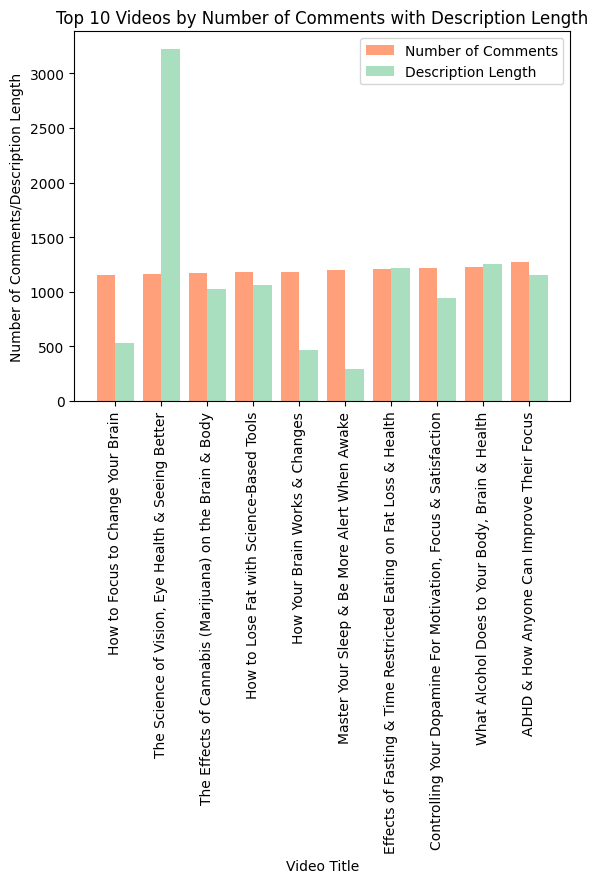

In [61]:
from statistics import mean
import matplotlib.pyplot as plt
import numpy as np

bar_x = np.arange(len(sort_x))
bar_width = 0.4

plt.bar(bar_x - bar_width/2, sort_y, color='#FFA07A', width=bar_width, label='Number of Comments')
plt.bar(bar_x + bar_width/2, sort_y2, color='#A9DFBF', width=bar_width, label='Description Length')

plt.xlabel("Video Title")
plt.xticks(bar_x, sort_x, rotation=90)
plt.ylabel("Number of Comments/Description Length")
plt.title("Top 10 Videos by Number of Comments with Description Length")
plt.legend()
plt.savefig('Top 10 Videos by Number of Comments with Description Length')
plt.show()

This visualization is exactly what I expected. The data doesn't seem to show any correlation to the number of comments and the length of video description.

This prompted me to look at just the top 10 videos in terms of view count and look at the trends regarding the comments and video description with this perspective.

In [44]:
sort_views = data_df
sorted_data = sort_views.sort_values('view_count')

In [47]:
sort_x = []
sort_y = []
sort_y2 = []
sort_y3 = []
for i in sorted_data.index[-10:]:
  helper = sorted_data.loc[i, 'video_title']
  sort_x.append(helper)
  sort_y.append(sorted_data.loc[i, 'num_comments'])
  sort_y2.append(len(sorted_data.loc[i, 'video_description']))
  sort_y3.append(sorted_data.loc[i, 'view_count'])

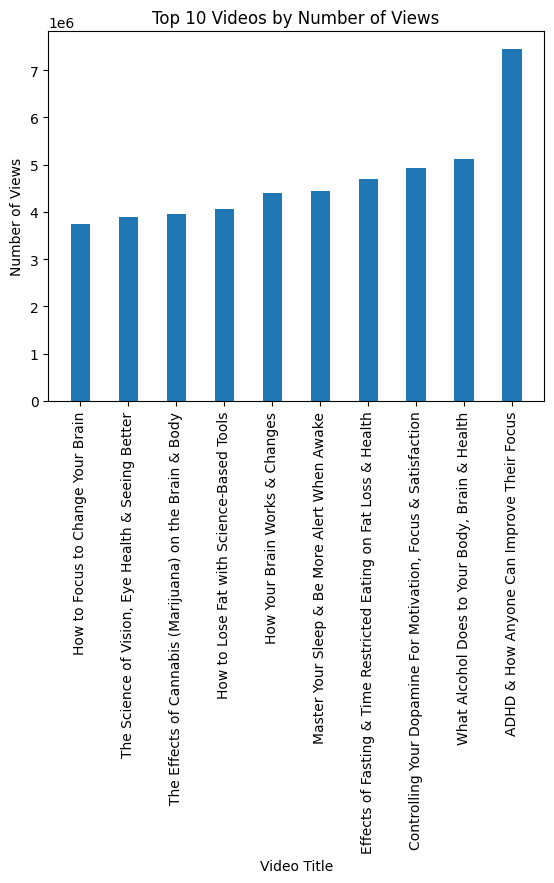

In [65]:
bar_x = np.arange(len(sort_x))
bar_width = 0.4

plt.bar(bar_x, sort_y3, width=bar_width)

plt.xlabel("Video Title")
plt.xticks(bar_x, sort_x, rotation=90)
plt.ylabel("Number of Views")
plt.title("Top 10 Videos by Number of Views")
plt.savefig('Top 10 Videos by Number of Views')
plt.show()

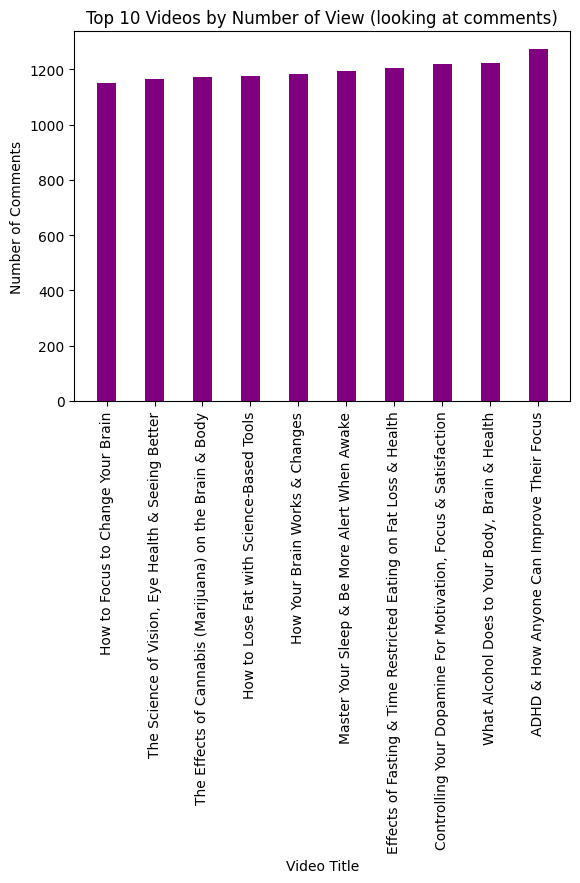

In [68]:
bar_x = np.arange(len(sort_x))
bar_width = 0.4

plt.bar(bar_x, sort_y, color='purple', width=bar_width)

plt.xlabel("Video Title")
plt.xticks(bar_x, sort_x, rotation=90)
plt.ylabel("Number of Comments")
plt.title("Top 10 Videos by Number of View (looking at comments)")
plt.savefig('Top 10 Videos by Number of View (looking at comments)')
plt.show()

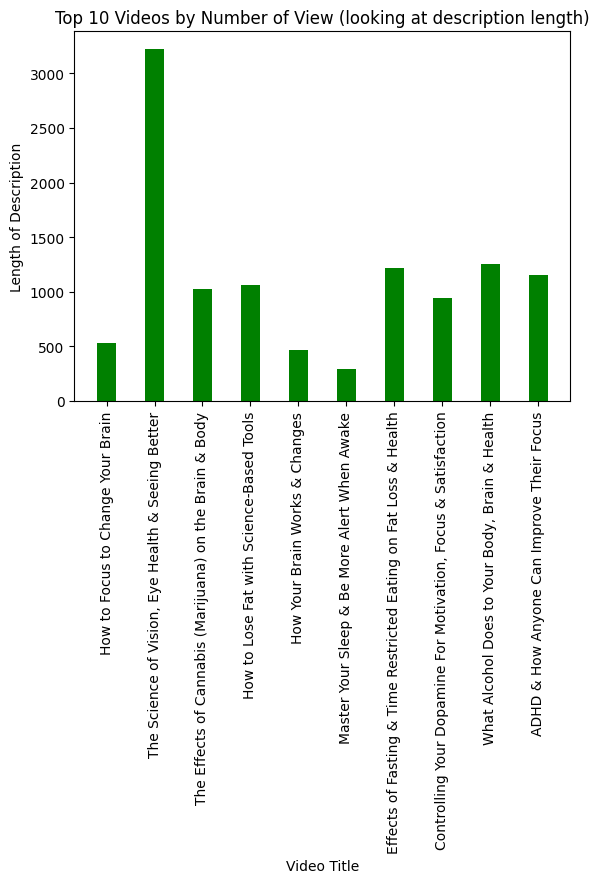

In [69]:
bar_x = np.arange(len(sort_x))
bar_width = 0.4

plt.bar(bar_x, sort_y2, color='green', width=bar_width)

plt.xlabel("Video Title")
plt.xticks(bar_x, sort_x, rotation=90)
plt.ylabel("Length of Description")
plt.title("Top 10 Videos by Number of View (looking at description length)")
plt.savefig('Top 10 Videos by Number of View (looking at description length)')
plt.show()

Again this was an expected result. The videos with more views seem to get more comments and the video description lengths don't seem to follow any trend.